In [1]:
## import some basic libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
## Reading the dataset
df= pd.read_csv("Churn_Modelling.csv")

EDA

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# devide the dataset into independent and dependent feature

X = df.drop(["RowNumber", "CustomerId", "Surname","Exited"], axis= 1)

In [5]:
y = df.iloc[:,13]

In [6]:
## Feature Engineering
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"],drop_first = True)

In [7]:
X = pd.concat([X,geography, gender], axis = 1).drop(["Geography", "Gender"], axis =1 )

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [10]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Lets Create ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LeakyReLU,PReLU,ELU,ReLU, Dropout

In [14]:
 ## Lets initialise th ANN
 classifier = Sequential()

In [15]:
#adding the input Layer
classifier.add(Dense(units= 11, activation = 'relu'))

In [16]:
#Adding the first hidden layer
classifier.add(Dense(units =7, activation = "relu"))

In [17]:
#Adding the second hidden layer
classifier.add(Dense(units =6, activation = "relu"))

In [18]:
#Adding output layer
classifier.add(Dense(units =1, activation = "sigmoid"))

In [19]:
import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate= 0.01)

In [20]:
## Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [21]:
classifier.compile(optimizer= opt, loss="binary_crossentropy",metrics=["accuracy"])

In [22]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 [==============================] - 10s 11ms/step - loss: 0.4215 - accuracy: 0.8235 - val_loss: 0.3939 - val_accuracy: 0.8330
Epoch 2/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.3689 - accuracy: 0.8453 - val_loss: 0.3637 - val_accuracy: 0.8576
Epoch 3/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3544 - accuracy: 0.8539 - val_loss: 0.3740 - val_accuracy: 0.8402
Epoch 4/1000
536/536 [==============================] - 6s 10ms/step - loss: 0.3490 - accuracy: 0.8580 - val_loss: 0.3608 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3476 - accuracy: 0.8593 - val_loss: 0.3613 - val_accuracy: 0.8489
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3437 - accuracy: 0.8589 - val_loss: 0.3712 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3424 - accuracy: 0.8556 - val_loss: 0.3712 - val_accur

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

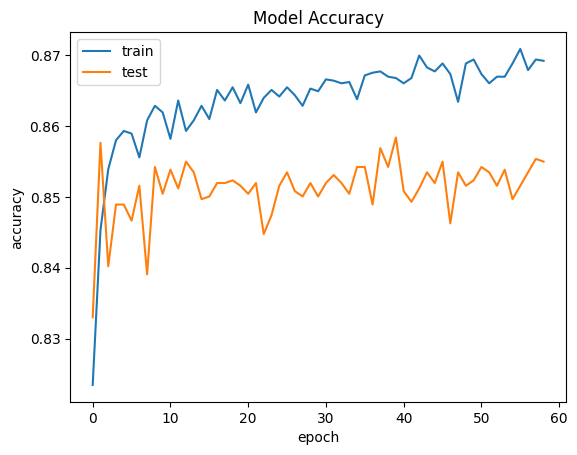

In [24]:
# Summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", 'test'], loc = "upper left")
plt.show()

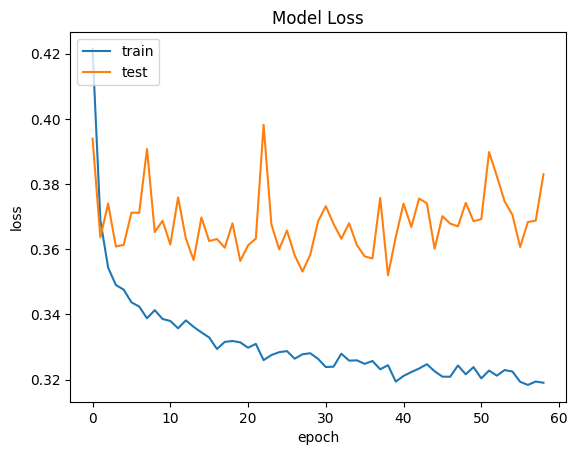

In [25]:
# Summarize history for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", 'test'], loc = "upper left")
plt.show()

Making the prediction

In [26]:
# Predicting the Test set REsults

y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [27]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1487,  108],
       [ 178,  227]])

In [28]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.857